<h1><center>Time Series Analysis of Financial Data</center></h1>

In [58]:
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from decimal import *
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

In [26]:
# Set start and end date for 60 months data from api.
start = datetime.datetime(2013, 11, 12) 
end = datetime.datetime(2018, 11, 12) 

# Yahoo Finance api calls with 'Adj Close' column for business month (BM) by method 'pad'
fb = web.DataReader('FB', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
mmm = web.DataReader('MMM', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
ibm = web.DataReader('IBM', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')
amzn = web.DataReader('AMZN', 'yahoo', start, end)['Adj Close'].asfreq('BM', method='pad')

In [45]:
# set the label of the subplots
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -4), ha='right', va='top', size=14, 
                xycoords='axes fraction', textcoords='offset points') 
    
# create autocorrelation plots
def AutoCorrelation(data, title):
    
    fig, axes = plt.subplots(nrows=3, figsize=(15, 12))
    
    # using tigh layout so there is no space between title and sub plots
    fig.tight_layout()
    
    # set the tilte for graph
    fig.suptitle(title, fontsize=16)
    
    label(axes[0], 'Raw Data')
    axes[0].plot(data)
     
    # create autocorrelation char from panda through autocorrelation_plot method
    label(axes[2], 'Pandas Autocorrelation PLot')
    pd.plotting.autocorrelation_plot(data, ax=axes[2])    
    plt.show()    

In [46]:
# Resampling the data based on months 
# By applying it on stock Adj Close price where M' indicates month 
fb= fb.resample('M').mean()
fb
mmm= mmm.resample('M').mean()
mmm
ibm= ibm.resample('M').mean()
ibm
amzn= amzn.resample('M').mean()
amzn

Date
2013-11-30     393.619995
2013-12-31     398.790009
2014-01-31     358.690002
2014-02-28     362.100006
2014-03-31     336.369995
2014-04-30     304.130005
2014-05-31     312.549988
2014-06-30     324.779999
2014-07-31     312.989990
2014-08-31     339.040009
2014-09-30     322.440002
2014-10-31     305.459991
2014-11-30     338.640015
2014-12-31     310.350006
2015-01-31     354.529999
2015-02-28     380.160004
2015-03-31     372.100006
2015-04-30     421.779999
2015-05-31     429.230011
2015-06-30     434.089996
2015-07-31     536.150024
2015-08-31     512.890015
2015-09-30     511.890015
2015-10-31     625.900024
2015-11-30     664.799988
2015-12-31     675.890015
2016-01-31     587.000000
2016-02-29     552.520020
2016-03-31     593.640015
2016-04-30     659.590027
2016-05-31     722.789978
2016-06-30     715.619995
2016-07-31     758.809998
2016-08-31     769.159973
2016-09-30     837.309998
2016-10-31     789.820007
2016-11-30     750.570007
2016-12-31     749.869995
2017-01

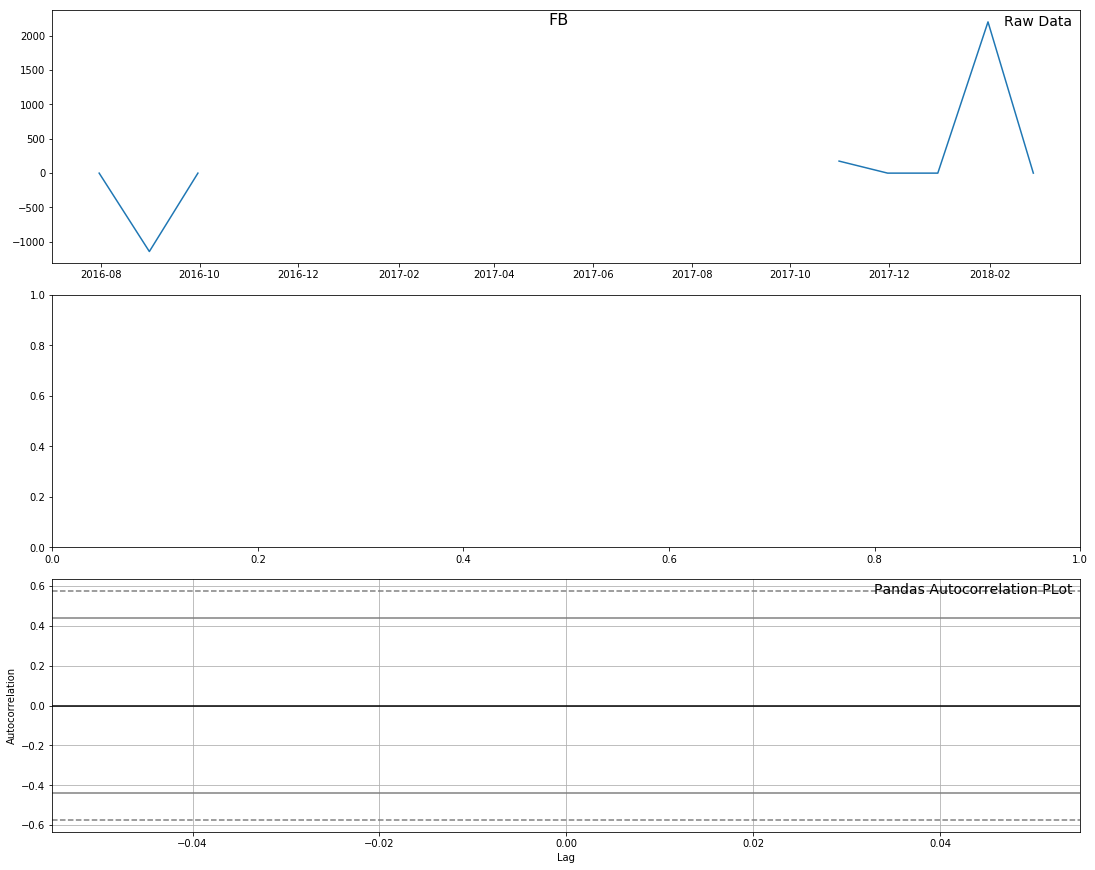

In [47]:
# create autocorrelation for FB
AutoCorrelation(fb, 'FB')

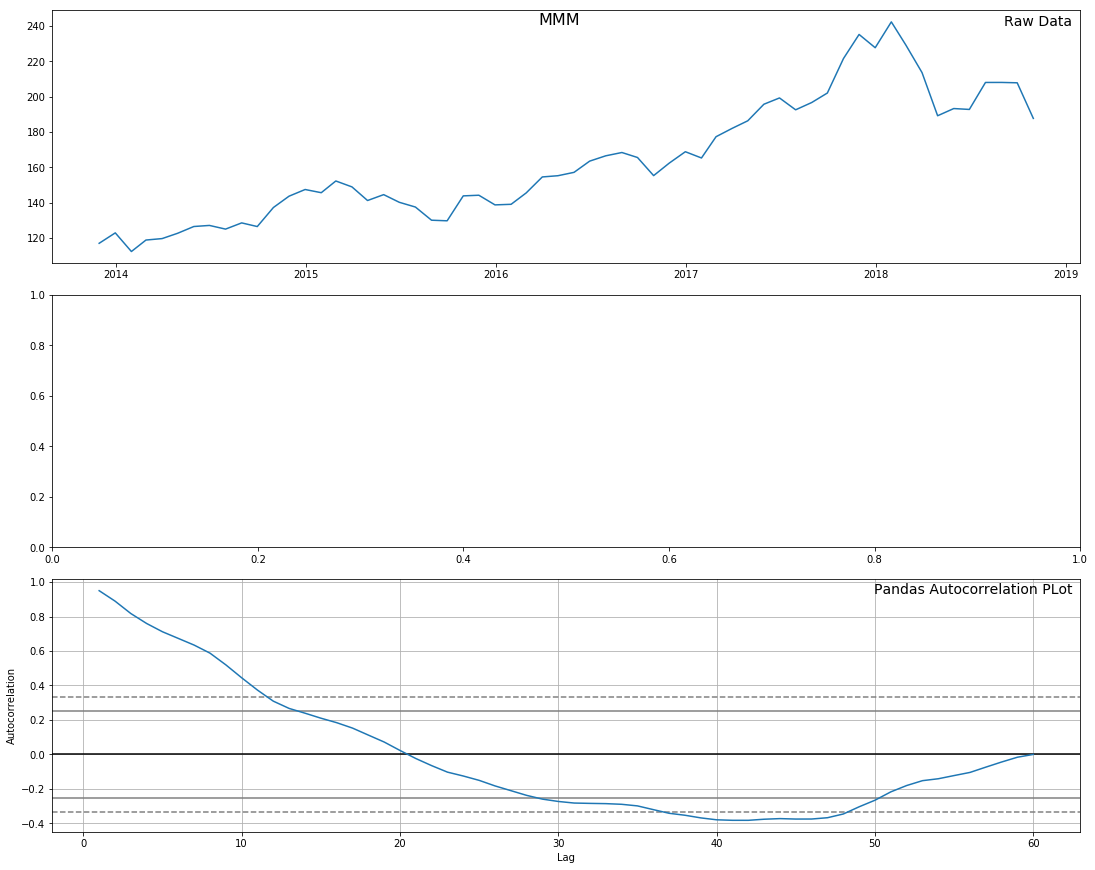

In [48]:
# create autocorrelation for MMM
AutoCorrelation(mmm, 'MMM')

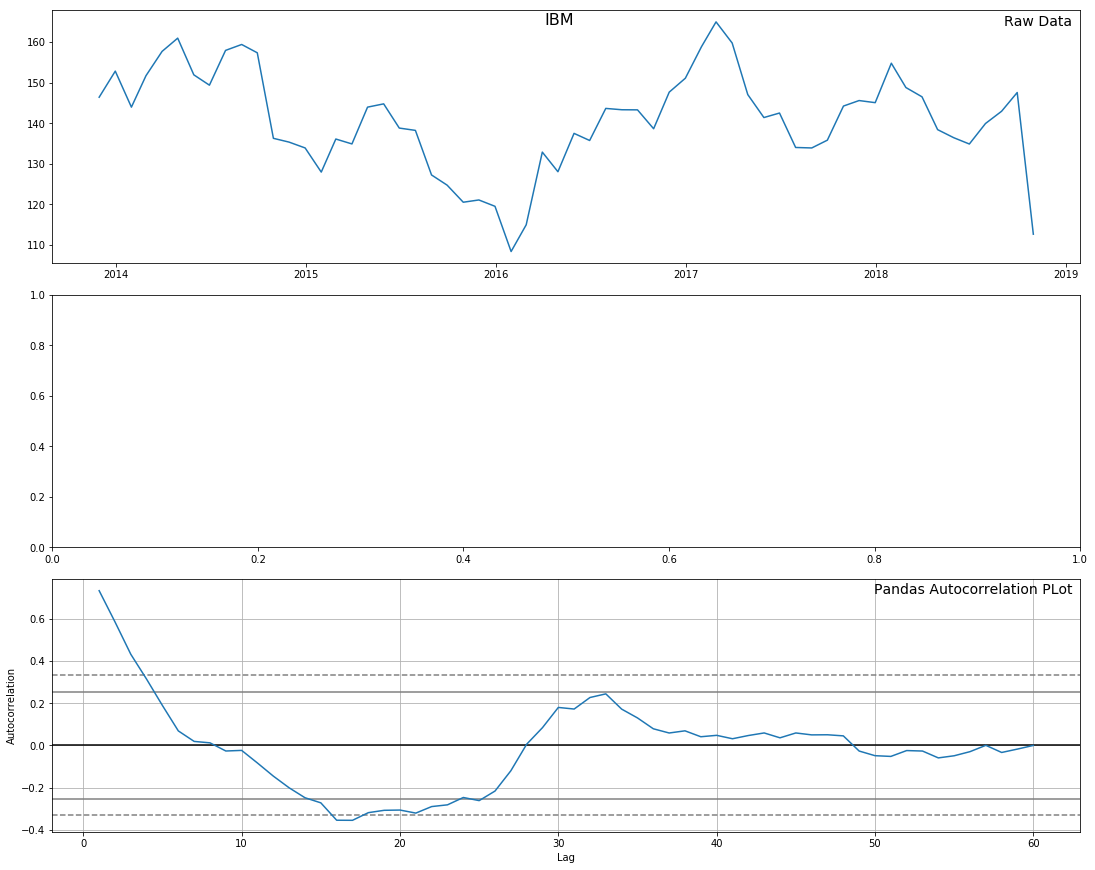

In [49]:
# create autocorrelation for IBM
AutoCorrelation(ibm, 'IBM')

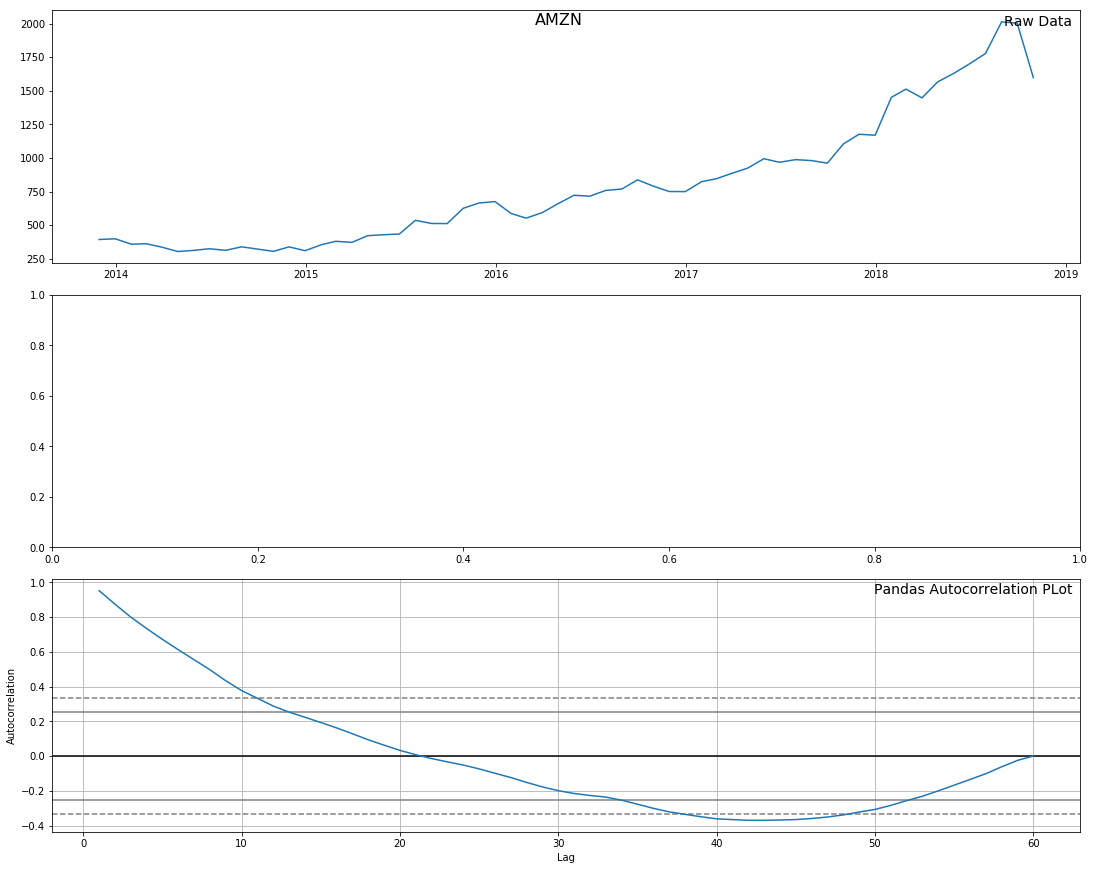

In [50]:
# create autocorrelation for AMZN
AutoCorrelation(amzn, 'AMZN')

<h1><center>AutoCorrelation Plots For Monthly Returns</center></h1>

Date
2016-08-31    1140.976963
2016-09-30      -0.999123
2017-11-30      -1.005727
2017-12-31       0.036551
2018-01-31   -2130.078709
2018-02-28      -1.000461
Name: Adj Close, dtype: float64


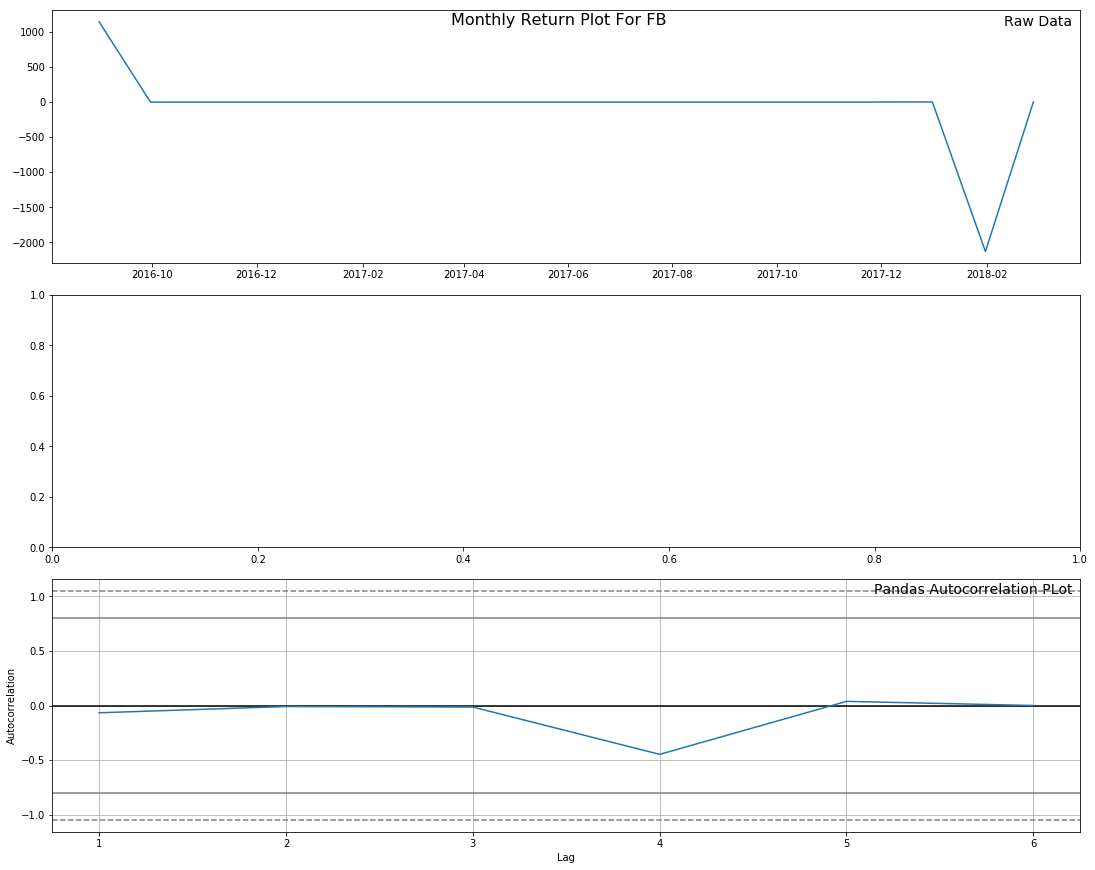

In [51]:
fb_return = (fb/fb.shift(1)-1).dropna()
print(fb_return)
# create monthly return autocorrelation for FB
AutoCorrelation((fb / fb.shift(1) - 1).dropna(), 'Monthly Return Plot For FB')

Date
2013-12-31    0.050483
2014-01-31   -0.085989
2014-02-28    0.057924
2014-03-31    0.006903
2014-04-30    0.025284
2014-05-31    0.031163
2014-06-30    0.004840
2014-07-31   -0.016406
2014-08-31    0.028168
2014-09-30   -0.016111
2014-10-31    0.085333
2014-11-30    0.046688
2014-12-31    0.026423
2015-01-31   -0.012293
2015-02-28    0.045588
2015-03-31   -0.021939
2015-04-30   -0.051894
2015-05-31    0.023633
2015-06-30   -0.030048
2015-07-31   -0.019183
2015-08-31   -0.054254
2015-09-30   -0.002603
2015-10-31    0.108909
2015-11-30    0.002537
2015-12-31   -0.037936
2016-01-31    0.002390
2016-02-29    0.046380
2016-03-31    0.062217
2016-04-30    0.004501
2016-05-31    0.012312
2016-06-30    0.040399
2016-07-31    0.018502
2016-08-31    0.011196
2016-09-30   -0.016793
2016-10-31   -0.062021
2016-11-30    0.045621
2016-12-31    0.039770
2017-01-31   -0.021000
2017-02-28    0.072895
2017-03-31    0.026724
2017-04-30    0.023520
2017-05-31    0.050356
2017-06-30    0.018193
2017-0

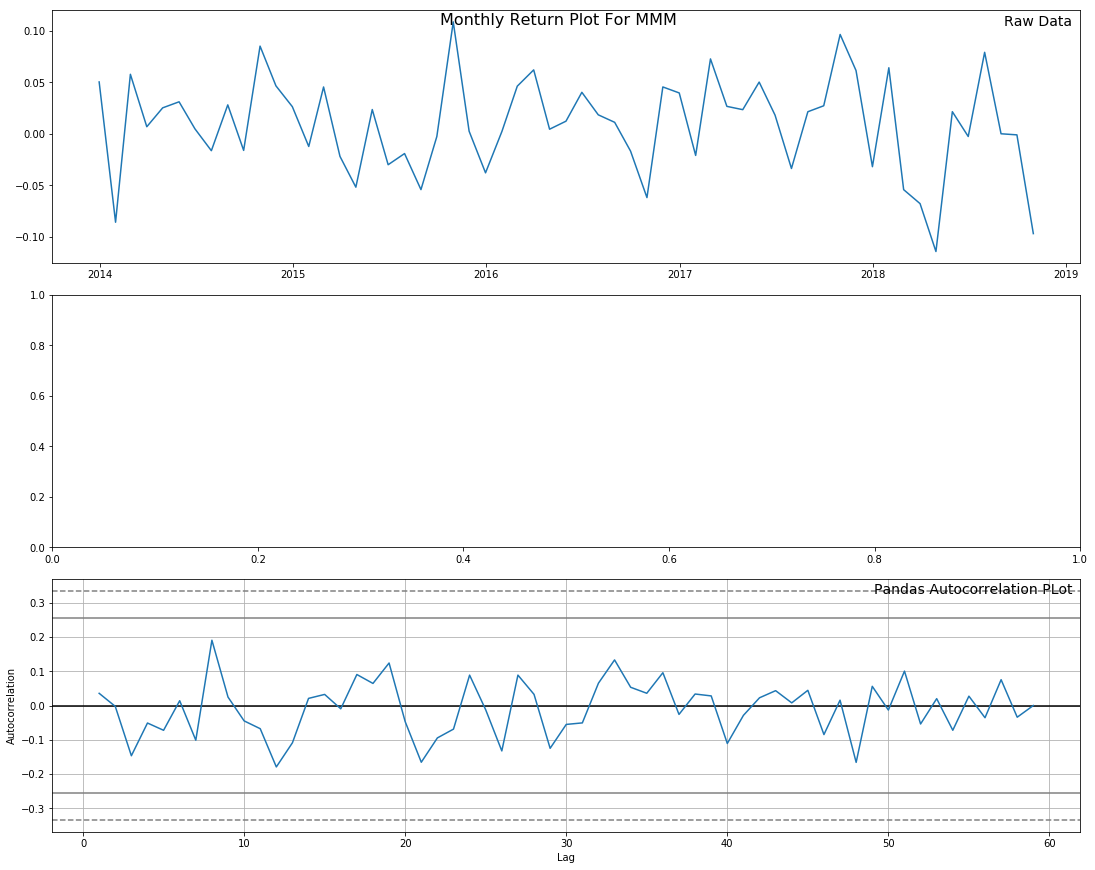

In [52]:
mmm_return = (mmm/mmm.shift(1)-1).dropna()
print(mmm_return)
# create monthly return autocorrelation for MMM
AutoCorrelation((mmm / mmm.shift(1) - 1).dropna(), 'Monthly Return Plot For MMM')

Date
2013-12-31    0.043912
2014-01-31   -0.058058
2014-02-28    0.053798
2014-03-31    0.039531
2014-04-30    0.020676
2014-05-31   -0.056175
2014-06-30   -0.016760
2014-07-31    0.057373
2014-08-31    0.009220
2014-09-30   -0.012845
2014-10-31   -0.133962
2014-11-30   -0.006813
2014-12-31   -0.010668
2015-01-31   -0.044440
2015-02-28    0.063701
2015-03-31   -0.008893
2015-04-30    0.067228
2015-05-31    0.005608
2015-06-30   -0.041202
2015-07-31   -0.004119
2015-08-31   -0.079464
2015-09-30   -0.019744
2015-10-31   -0.033731
2015-11-30    0.004625
2015-12-31   -0.012911
2016-01-31   -0.093228
2016-02-29    0.060729
2016-03-31    0.155842
2016-04-30   -0.036382
2016-05-31    0.073820
2016-06-30   -0.012749
2016-07-31    0.058242
2016-08-31   -0.002290
2016-09-30   -0.000189
2016-10-31   -0.032484
2016-11-30    0.065077
2016-12-31    0.023240
2017-01-31    0.051388
2017-02-28    0.038516
2017-03-31   -0.031587
2017-04-30   -0.079534
2017-05-31   -0.038486
2017-06-30    0.007862
2017-0

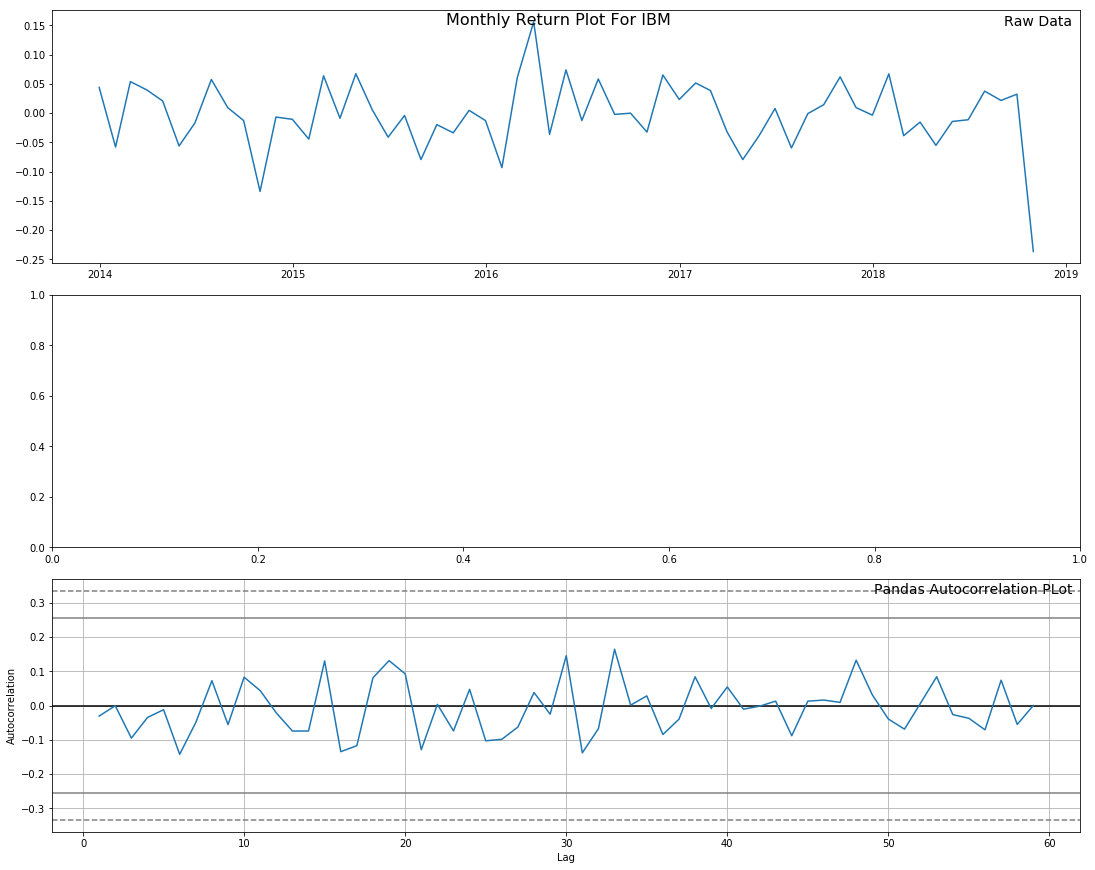

In [53]:
ibm_return = (ibm/ibm.shift(1)-1).dropna()
print(ibm_return)
# create monthly return autocorrelation for IBM
AutoCorrelation((ibm / ibm.shift(1) - 1).dropna(), 'Monthly Return Plot For IBM')

Date
2013-12-31    0.013135
2014-01-31   -0.100554
2014-02-28    0.009507
2014-03-31   -0.071058
2014-04-30   -0.095847
2014-05-31    0.027685
2014-06-30    0.039130
2014-07-31   -0.036302
2014-08-31    0.083230
2014-09-30   -0.048962
2014-10-31   -0.052661
2014-11-30    0.108623
2014-12-31   -0.083540
2015-01-31    0.142355
2015-02-28    0.072293
2015-03-31   -0.021202
2015-04-30    0.133512
2015-05-31    0.017663
2015-06-30    0.011323
2015-07-31    0.235113
2015-08-31   -0.043383
2015-09-30   -0.001950
2015-10-31    0.222724
2015-11-30    0.062150
2015-12-31    0.016682
2016-01-31   -0.131516
2016-02-29   -0.058739
2016-03-31    0.074423
2016-04-30    0.111094
2016-05-31    0.095817
2016-06-30   -0.009920
2016-07-31    0.060353
2016-08-31    0.013640
2016-09-30    0.088603
2016-10-31   -0.056717
2016-11-30   -0.049695
2016-12-31   -0.000933
2017-01-31    0.098164
2017-02-28    0.026182
2017-03-31    0.049110
2017-04-30    0.043371
2017-05-31    0.075276
2017-06-30   -0.026764
2017-0

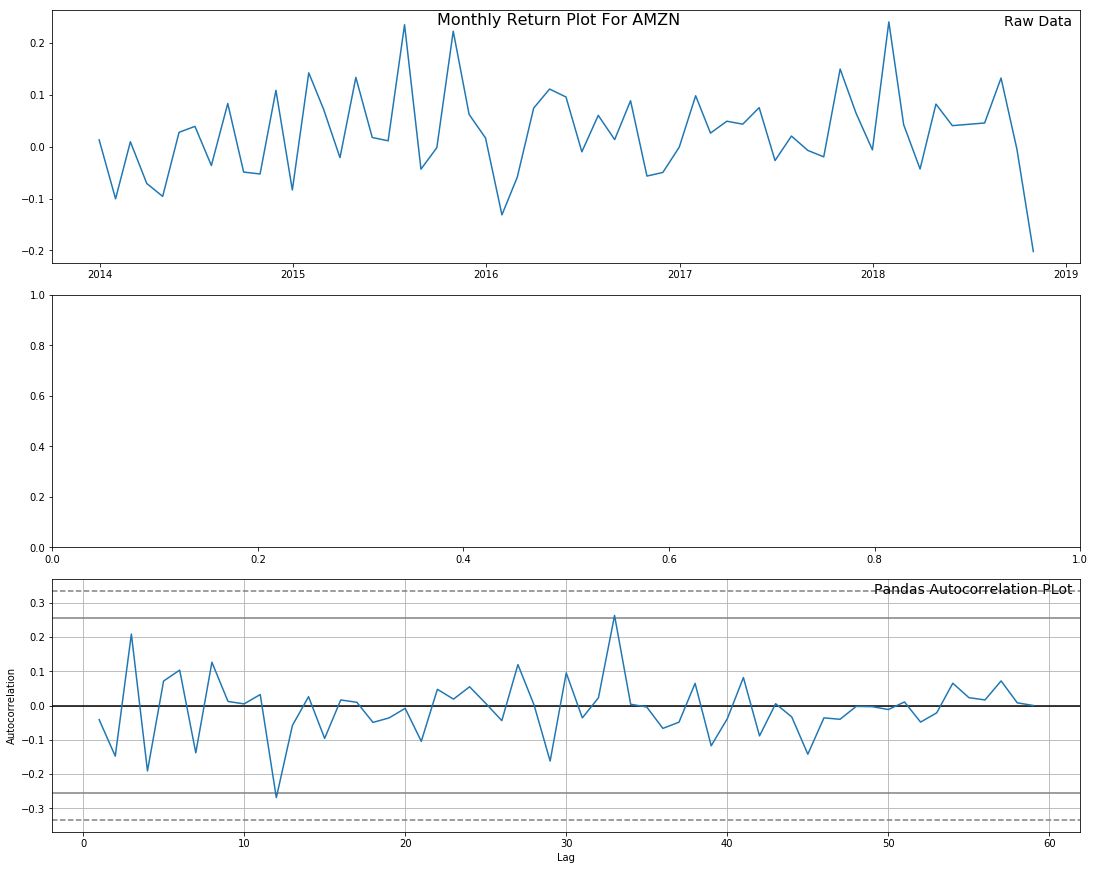

In [54]:
amzn_return = (amzn/amzn.shift(1)-1).dropna()
print(amzn_return)
# create monthly return autocorrelation for AMZN
AutoCorrelation((amzn / amzn.shift(1) - 1).dropna(), 'Monthly Return Plot For AMZN')

In [62]:
df=[fb_return,mmm_return,ibm_return,amzn_return]
returns = pd.concat(df, axis=0, ignore_index=True)
print(returns)

0      1140.976963
1        -0.999123
2        -1.005727
3         0.036551
4     -2130.078709
5        -1.000461
6         0.050483
7        -0.085989
8         0.057924
9         0.006903
10        0.025284
11        0.031163
12        0.004840
13       -0.016406
14        0.028168
15       -0.016111
16        0.085333
17        0.046688
18        0.026423
19       -0.012293
20        0.045588
21       -0.021939
22       -0.051894
23        0.023633
24       -0.030048
25       -0.019183
26       -0.054254
27       -0.002603
28        0.108909
29        0.002537
          ...     
153       0.095817
154      -0.009920
155       0.060353
156       0.013640
157       0.088603
158      -0.056717
159      -0.049695
160      -0.000933
161       0.098164
162       0.026182
163       0.049110
164       0.043371
165       0.075276
166      -0.026764
167       0.020434
168      -0.007269
169      -0.019631
170       0.149717
171       0.064662
172      -0.006187
173       0.240639
174       0.

In [60]:
pd.scatter_matrix(returns, diagonal='kde', alpha=0.1,figsize=(12,12))
plt.show()

c:\users\shivam\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


AttributeError: 'Series' object has no attribute 'columns'